In [81]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt


In [2]:
dirpath='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_newcode_20180611/output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root'
treename='GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0'
treepath='tagsDumper/trees/'

In [4]:
df = rpd.read_root(dirpath,treepath+treename)

In [9]:
print any(df.isnull().any()) # no NANs in the dataframe

False


In [112]:
jets='subleading,leading'.split(',')
ofwhat='pt,eta'.split(',')
ranges = [[20,300],[-3.,3]]
binning = [50,20]
colors=['r','g']
colors2=['b','c']
markers=['s','o']

In [113]:
pathsave='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/applied_breg/'

(51,)
50
(51,)
50


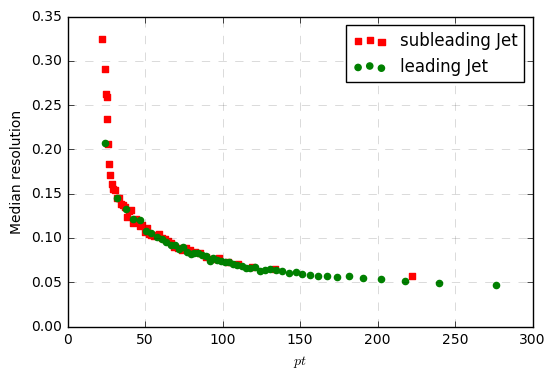

(21,)
20
(21,)
20


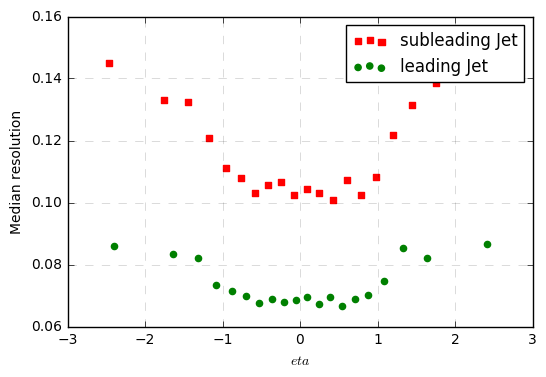

In [114]:
for num_what,what in enumerate(ofwhat):
    for num,obj in enumerate(jets):
        X_what = (df['%sJet_%s'%(obj,what)]).values.reshape(-1,1)
        res = (df['%sJet_bRegNNResolution'%(obj)]).values.reshape(-1,1)
        ran = ranges[num_what]
        bins = binning[num_what]
        
        bins, y_mean_pt, y_std_pt, y_qt_pt = preprocessing.profile(res,X_what,range=ran,bins=bins,uniform=False,quantiles=np.array([0.25,0.4,0.5,0.75]))
        y_median_pt = y_qt_pt[2]
        y_25_pt,y_40_pt,y_75_pt = y_qt_pt[0],y_qt_pt[1],y_qt_pt[3]
        y_iqr2_pt =  y_qt_pt[0],y_qt_pt[3]
        err_iqr2 =  0.5*(y_qt_pt[3]-y_qt_pt[0])
        binc = 0.5*(bins[1:]+bins[:-1])

       # plt.scatter(binc,y_mean_pt,color=colors[num],marker=markers[num],label='%s Jet'%obj) #mean
        plt.scatter(binc,y_median_pt,color=colors[num],marker=markers[num],label='%s Jet'%obj)

    plt.grid(alpha=0.2,linestyle='--',markevery=2)
    axes = plt.gca()
    ymin, ymax = (plt.gca()).get_ylim()
    xmin, xmax = (plt.gca()).get_xlim()
    lgd = plt.legend(loc="upper right")
    plt.xlabel('$%s$'%what)
    plt.ylabel('Median resolution')
    savename='plot_%sJet_%s'%(obj,what)
    plt.savefig(pathsave+savename+'.pdf')
    plt.show()


(51,)
50
(51,)
50


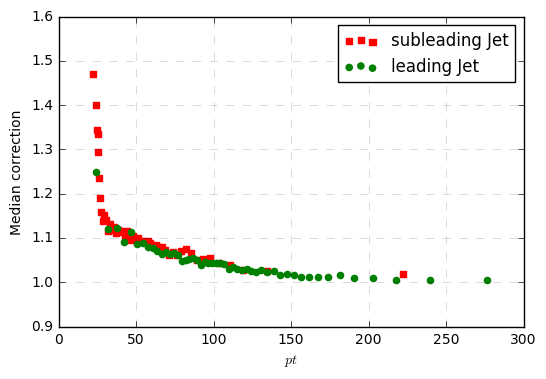

(21,)
20
(21,)
20


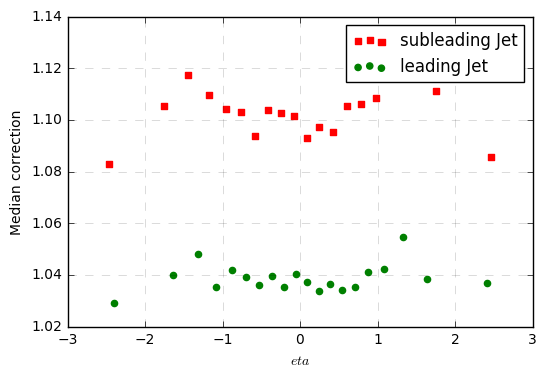

In [115]:
for num_what,what in enumerate(ofwhat):
    for num,obj in enumerate(jets):
        X_what = (df['%sJet_%s'%(obj,what)]).values.reshape(-1,1)
        res = (df['%sJet_bRegNNCorr'%(obj)]).values.reshape(-1,1)
        ran = ranges[num_what]
        bins = binning[num_what]
        
        bins, y_mean_pt, y_std_pt, y_qt_pt = preprocessing.profile(res,X_what,range=ran,bins=bins,uniform=False,quantiles=np.array([0.25,0.4,0.5,0.75]))
        y_median_pt = y_qt_pt[2]
        y_25_pt,y_40_pt,y_75_pt = y_qt_pt[0],y_qt_pt[1],y_qt_pt[3]
        y_iqr2_pt =  y_qt_pt[0],y_qt_pt[3]
        err_iqr2 =  0.5*(y_qt_pt[3]-y_qt_pt[0])
        binc = 0.5*(bins[1:]+bins[:-1])

        plt.scatter(binc,y_median_pt,color=colors[num],marker=markers[num],label='%s Jet'%obj)

    plt.grid(alpha=0.2,linestyle='--',markevery=2)
    axes = plt.gca()
    ymin, ymax = (plt.gca()).get_ylim()
    xmin, xmax = (plt.gca()).get_xlim()
    lgd = plt.legend(loc="upper right")
    plt.xlabel('$%s$'%what)
    plt.ylabel('Median correction')
    savename='plot_correction_%sJet_%s'%(obj,what)
    plt.savefig(pathsave+savename+'.pdf')
    plt.show()
